# Common objects

This page is meant as a super-fast introduction to some of the object types used in `prospect` that may not be familiar to new Python users. I will only cover objects that come from outside this package. `prospect`-defined objects (`Area`, `Feature`, `SurveyUnit`, etc) all have their own pages in this guide.

## SciPy continuous distributions

SciPy distributions were introduced in the [Parameters](./parameters) section of the guide. To be precise, `prospect` uses SciPy "frozen" continuous distributions. The frozen version is simply an instantiated distribution whose parameters are fixed. This allows it to be passed around as an object without specifying the parameters each time you want to use a method like `.rvs()`, which draws random values.

## Shapely objects

From the [Shapely documentation](https://shapely.readthedocs.io/):

>Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library.

All of the spatial components of `prospect` are defined by `shapely` objects, either directly or as part of `geopandas` `GeoDataFrame` objects (see below), which depends on `shapely`.

The main shapes of interest are the point, line, and polygon, represented in `shapely` by the `Point`, `LineString`, and `Polygon` objects.

### Point

Points are most useful for modeling individual `Feature` objects. You can pass coordinates directly or as a tuple to the `Point` constructor.

In [1]:
from shapely.geometry import Point

direct_pt = Point(5, 27)
tuple_pt = Point((5, 27))

Both methods produce the same result.

In [2]:
direct_pt == tuple_pt

True

Often you will want to create many points at once from lists of x and y coordinates. Here is a helpful idiom for doing that.

In [3]:
xs = [1, 2, 3, 4, 5]
ys = [6, 7, 8, 9, 10]
pts = [Point(xy) for xy in zip(xs, ys)]

This gives you a list that can easily be used to create, for example, many `Feature` objects.

In [4]:
pts

In [5]:
import prospect

feature_list = []
for i in range(len(pts)):
    pt = prospect.Feature(name=f"feature_{i}", layer_name=f"demo_layer", shape=pts[i])
    feature_list.append(pt)

In [6]:
feature_list

Let's look at the attributes of the first element in the list.

In [7]:
feature_list[0].__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe48fbdaee0>,
 'name': 'feature_0',
 'layer_name': 'demo_layer',
 'shape': <shapely.geometry.point.Point at 0x7fe48fbda7f0>,
 'time_penalty': 0.0,
 'ideal_obs_rate': 1.0}

Everything seems to match what we created in the loop, so this list of `Feature` objects could now be passed to the `Layer` constructor.

### LineString

The `LineString` is also useful for creating `Feature` objects. The `LineString` constructor works with a sequence of coordinate tuples.

In [8]:
from shapely.geometry import LineString

line = LineString([(1,3), (2,9), (3, 27)])

Sometimes it can be helpful to inspect some attributes of the `LineString` object.

In [9]:
line.length

24.110518907618165

In [10]:
list(line.coords)

[(1.0, 3.0), (2.0, 9.0), (3.0, 27.0)]

### Polygon

The `Polygon` object is used widely in `prospect`. `Feature`, `SurveyUnit`, and `Area` objects can all be constructed from `Polygon` objects. Specifying a `Polygon` from scratch is more complicated than for the `Point` and `LineString`. [From the `shapely` docs](https://shapely.readthedocs.io/en/latest/manual.html#polygons):
>The Polygon constructor takes two positional parameters. The first is an ordered sequence of (x, y[, z]) point tuples and is treated exactly as in the LinearRing case. The second is an optional unordered sequence of ring-like sequences specifying the interior boundaries or “holes” of the feature.

A simple triangular `Polygon` can be constructed like this.

In [11]:
from shapely.geometry import Polygon

poly = Polygon([(0, 0), (1, 1), (1, 0)])

It has area and length attributes that can be useful.

In [12]:
poly.area

0.5

In [13]:
poly.length

3.414213562373095

## Geopandas objects

The real engine of `prospect` is the `geopandas` `GeoDataFrame`. A `GeoDataFrame` is just like a regular `pandas` `DataFrame`, with rows and columns of data, except that it has one special column, the "geometry", that holds spatial information. Each entry in the geometry column is a `shapely` object like a `Point`, `LineString`, or `Polygon`. This format allows normal tabular data to be directly associated with their related spatial objects. In `prospect`, this means we can keep simulation parameters tied to their locations.

Each of the four top-level building blocks have an attribute called `df`. For the `Area`, `Assemblage`, and `Coverage`, `df` is a `GeoDataFrame` and contains all of the information needed for running the actual survey.

Let's create a simple `Area` from the `Polygon` we created earlier.

In [14]:
import prospect

triangle_area = prospect.Area(name="demo_area", shape=poly, vis=1.0)

And let's examine the `df` attribute.

In [15]:
type(triangle_area.df)

geopandas.geodataframe.GeoDataFrame

In [16]:
triangle_area.df

,name,shape,vis
0,demo_area,"POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1....",1.0


In [17]:
triangle_area.df.geometry.name

'shape'

In this example, the geometry column is named "shape". Because the `GeoDataFrame` works like a typical `pandas` `DataFrame`, we can access the first element in that column (the `shapely` `Polygon`) with normal `pandas` indexing.

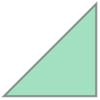

In [18]:
triangle_area.df['shape'][0]

## Shapefiles

Shapefiles are a popular data storage format for vector data. `prospect` leverages `geopandas` functionality to read in a shapefile and convert it to a `GeoDataFrame` that can in turn be used in the creation of `prospect` objects. 

```{note}
For more on shapefiles, see [What is a shapefile?](http://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm).
```

## Next...
We will begin examining the building blocks defined by `prospect`.